# Time series analysis on the data International Airline Passengers from 1040 to 1060

In [3]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# data fetch from github
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

<Axes: xlabel='Month', ylabel='#Passengers'>

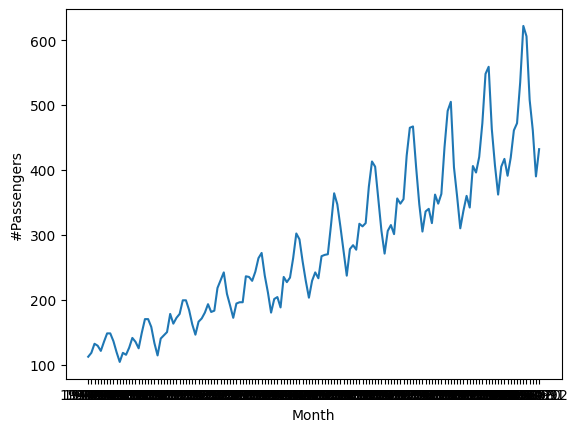

In [6]:
# plot this data to see trends and seasonality with seaborn
sns.lineplot(x="Month", y="#Passengers", data=df)

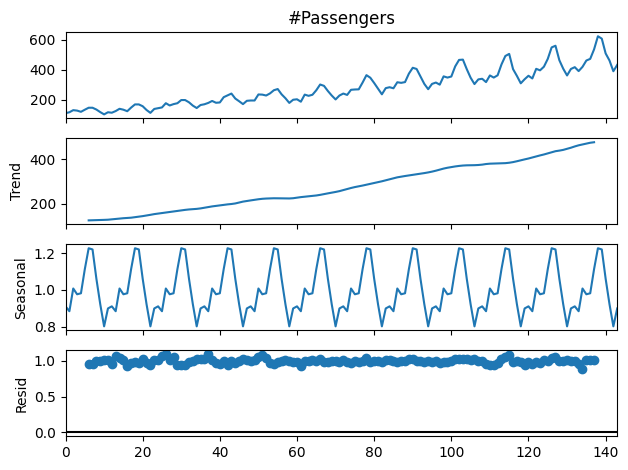

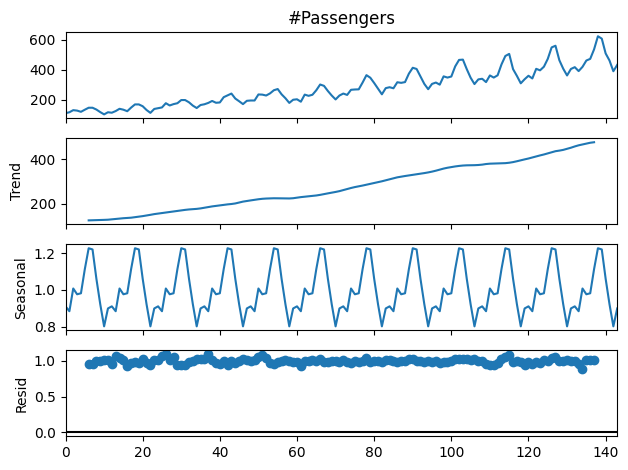

In [7]:
# decompose the data into trend, seasonality and residuals
decompose = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decompose.plot()

<Axes: >

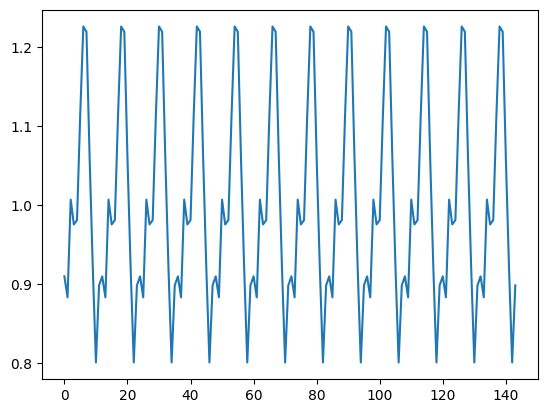

In [8]:
decompose.seasonal.plot()

In [9]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

In [10]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Epoch 1/100
11/11 [==============================] - 4s 4ms/step - loss: 53976.3633 - root_mean_squared_error: 232.3281
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 28891.7578 - root_mean_squared_error: 169.9758
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 14455.1992 - root_mean_squared_error: 120.2298
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 6530.9731 - root_mean_squared_error: 80.8144
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 2778.7673 - root_mean_squared_error: 52.7140
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 1439.2357 - root_mean_squared_error: 37.9373
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 1101.0598 - root_mean_squared_error: 33.1822
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 1073.7346 - root_mean_squared_error: 32.7679
Epoch 9/100
11/11 [===========================

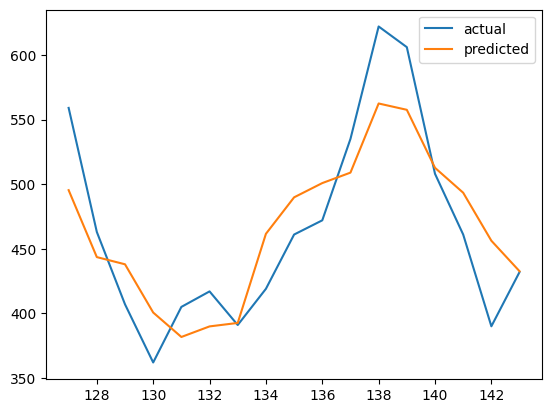

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()